# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
dataset = "https://raw.githubusercontent.com/aesxiety/Coding-Camp-DBS/main/Belajar%20Machine%20Learning%20untuk%20Pemula/Dataset/Dataset_hasil_clustering.csv"

try:
  df = pd.read_csv(dataset)
  print("Data berhasil dibaca!")
  print("Jumlah baris dan kolom:", df.shape)
except FileNotFoundError:
  print(f"Error: Tidak ditemukan {dataset}. coba cek dataset.")
except pd.errors.ParserError:
    print(f"Error: Tidak bisa digunakan {dataset}. coba cek format filenya.")
except Exception as e:
    print(f"Error: {e}")

Data berhasil dibaca!
Jumlah baris dan kolom: (14359, 12)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14359 entries, 0 to 14358
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 14359 non-null  object 
 1   price                14359 non-null  float64
 2   depreciation         14359 non-null  float64
 3   mileage              14359 non-null  float64
 4   brand                14359 non-null  object 
 5   carage               14359 non-null  float64
 6   brand_encoded        14359 non-null  int64  
 7   price_scaled         14359 non-null  float64
 8   mileage_scaled       14359 non-null  float64
 9   depreciation_scaled  14359 non-null  float64
 10  carage_scaled        14359 non-null  float64
 11  Cluster_KMeans       14359 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.3+ MB


In [4]:
print("Jumlah Nilai Unik per Kolom:")
print(df.nunique(), "\n")\

missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Dataset memiliki nilai yang null!")
    print(missing_values[missing_values > 0], "\n")
else:
    print("Tidak ada nilai yang null dalam dataset!\n")

Jumlah Nilai Unik per Kolom:
name                   4708
price                  2186
depreciation           2082
mileage                4074
brand                    63
carage                   19
brand_encoded            63
price_scaled           2186
mileage_scaled         4074
depreciation_scaled    2082
carage_scaled            19
Cluster_KMeans            4
dtype: int64 

Tidak ada nilai yang null dalam dataset!



# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
X = df[['brand_encoded', 'price_scaled', 'mileage_scaled', 'depreciation_scaled', 'carage_scaled']]
y = df['Cluster_KMeans']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nJumlah data training: {X_train.shape[0]}, testing: {X_test.shape[0]}")

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Fitur terpilih: {selected_features}")


Jumlah data training: 10051, testing: 4308
Fitur terpilih: ['brand_encoded', 'price_scaled', 'mileage_scaled', 'depreciation_scaled', 'carage_scaled']


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### **1️⃣ Support Vector Machine (SVM)**

In [7]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_selected, y_train)

print("\nModel  SVM berhasil dilatih.")


Model  SVM berhasil dilatih.


Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang mencari **hyperplane terbaik** untuk memisahkan kelas dalam data.  
- Menggunakan *kernel trick* (RBF Kernel) untuk menangani data yang tidak terpisah secara linear.  
- Mencari *support vectors* yang menentukan batas keputusan terbaik.

### **2️⃣ Random Forest Classifier (RFC)**

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
print("\nModel Random Forest berhasil dilatih.")


Model Random Forest berhasil dilatih.


Random Forest adalah algoritma berbasis *ensemble learning* yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi.  
- Setiap pohon dilatih dengan subset data yang berbeda (bagging method).  
- Keputusan akhir ditentukan dengan *voting mayoritas* dari semua pohon.  
- Kuat terhadap *overfitting* dan bekerja baik pada data numerik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Evaluasi Model SVM


Metriks Evaluasi SVM
Akurasi: 0.9986
F1-Score: 0.9986

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1420
           1       1.00      1.00      1.00       866
           2       1.00      1.00      1.00      1096
           3       1.00      1.00      1.00       926

    accuracy                           1.00      4308
   macro avg       1.00      1.00      1.00      4308
weighted avg       1.00      1.00      1.00      4308



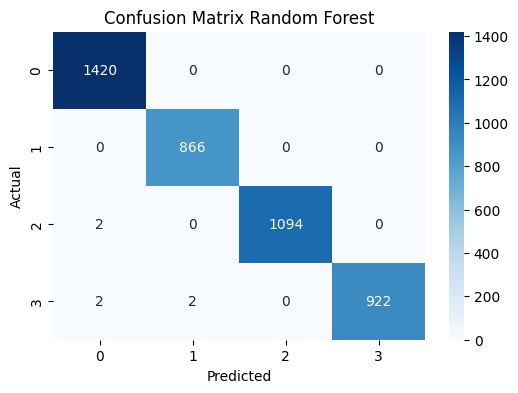

In [20]:
y_pred_svm = svm_model.predict(X_test_selected)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("\nMetriks Evaluasi SVM")
print(f"Akurasi: {acc_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix Random Forest
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM
- Mencapai akurasi 99.86%, yang menunjukkan performa hampir sempurna.
- F1-Score juga 99.86%, menandakan keseimbangan antara precision dan recall.
- Model ini stabil dan mampu menangani data non-linear dengan baik karena menggunakan RBF Kernel.

### Evaluasi Model Random Forest


Metriks Evaluasi rf
Akurasi: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1420
           1       1.00      1.00      1.00       866
           2       1.00      1.00      1.00      1096
           3       1.00      1.00      1.00       926

    accuracy                           1.00      4308
   macro avg       1.00      1.00      1.00      4308
weighted avg       1.00      1.00      1.00      4308



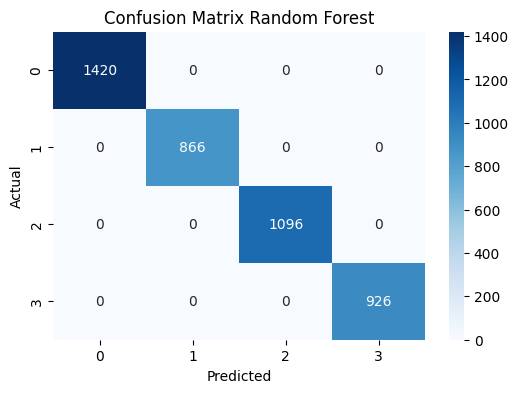

In [21]:
y_pred_rf = rf_model.predict(X_test_selected)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\nMetriks Evaluasi rf")
print(f"Akurasi: {acc_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest (RFC) :
- Mencapai akurasi sempurna 100% pada data uji.
- F1-Score juga 100%, menunjukkan tidak ada kesalahan klasifikasi pada data ini.
- Random Forest menggunakan banyak pohon keputusan, sehingga memiliki daya generalisasi yang lebih baik dan lebih kuat terhadap overfitting.

Kesimpulan :
- Kedua model menunjukkan performa yang sangat tinggi, dengan RFC sedikit lebih unggul karena mencapai akurasi 100%
- SVM tetap menjadi pilihan kuat karena performanya hampir sempurna, terutama jika dataset lebih kompleks atau jumlah fitur meningkat.
- perlu memastikan model RFC tidak mengalami overfitting.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [26]:
param_grid_rf = {
    'n_estimators': [50,100, 200],
    'max_depth': [5,10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train_selected, y_train)
print("\nTuning Random Forest:")
print(f"Parameter terbaik: {grid_rf.best_params_}")


Tuning Random Forest:
Parameter terbaik: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Percobaan mengurangi batas kedalaman pohon

In [27]:
rf_model_lowdepth = RandomForestClassifier(
    n_estimators=50,      # Kurangi jumlah pohon
    max_depth=5,          # Batasi kedalaman pohon
    min_samples_split=2, # Batasi jumlah minimal sampel untuk split
    random_state=42
)
rf_model_lowdepth.fit(X_train, y_train)
print(f"Akurasi Training: {rf_model.score(X_train, y_train):.4f}")
print(f"Akurasi Testing: {rf_model.score(X_test, y_test):.4f}")

Akurasi Training: 0.9944
Akurasi Testing: 0.9965


Perbedaan kecil antara training dan testing menunjukkan model tidak mengalami overfitting yang parah.

Menggunanakan parameter terbaik hasil gridsearch

In [32]:
rf_model_opt = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)
rf_model_opt.fit(X_train, y_train)
print(f"Akurasi Training: {rf_model_opt.score(X_train, y_train):.4f}")
print(f"Akurasi Testing: {rf_model_opt.score(X_test, y_test):.4f}")

Akurasi Training: 1.0000
Akurasi Testing: 1.0000


Akurasi Random Forest (setelah tuning): 1.0000
F1-Score Random Forest (setelah tuning): 1.0000
Classification Report setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1420
           1       1.00      1.00      1.00       866
           2       1.00      1.00      1.00      1096
           3       1.00      1.00      1.00       926

    accuracy                           1.00      4308
   macro avg       1.00      1.00      1.00      4308
weighted avg       1.00      1.00      1.00      4308



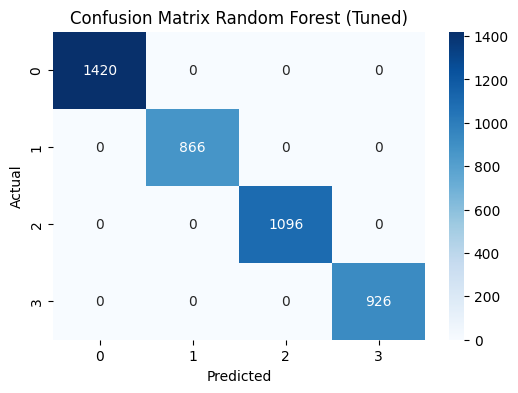

In [33]:
# Evaluasi Random Forest setelah Tuning
y_pred_rf_opt = grid_rf.predict(X_test_selected)
acc_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt, average='weighted')
print(f"Akurasi Random Forest (setelah tuning): {acc_rf_opt:.4f}")
print(f"F1-Score Random Forest (setelah tuning): {f1_rf_opt:.4f}")
print("Classification Report setelah Tuning:")
print(classification_report(y_test, y_pred_rf_opt))

# Confusion Matrix setelah Tuning
cm_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_opt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1.Perbandingan Hasil Sebelum & Setelah Tuning
- Sebelum tuning (max_depth=5):
✅ Training: 99.44%, Testing: 99.65% → Generalisasi cukup baik, tapi bisa jadi belum menangkap seluruh kompleksitas data.

- Setelah tuning (max_depth=10):
✅ Training & Testing: 100%, menunjukkan model mungkin mengalami overfitting karena akurasi terlalu sempurna.

2.Identifikasi Kelemahan Model

📌 Apakah Precision atau Recall rendah untuk kelas tertentu?

- Tidak, karena precision & recall 1.00 untuk semua kelas.

📌 Apakah model mengalami Overfitting atau Underfitting?

- Model dengan max_depth=10 menunjukkan kemungkinan overfitting, karena akurasi sempurna di training & testing.

- Model dengan max_depth=5 lebih stabil, dengan sedikit perbedaan antara training dan testing.

3.Rekomendasi Tindakan Lanjutan

Jika ingin menghindari overfitting:

- Gunakan model dengan max_depth=5 karena lebih stabil.

Jika tetap ingin mempertahankan model max_depth=10:

- Uji model dengan data yang benar-benar baru untuk melihat apakah performa tetap tinggi.

- Coba drop fitur yang mungkin terlalu dominan, agar model tidak terlalu “menghafal” pola data.